#PROBLEM 6: DBSCAN on toy raw data
Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. Run your own implementation of DBSCAN on these, in two phases.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.spatial import KDTree
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
circles = pd.read_csv('/content/drive/MyDrive/USML/HW 2B/circle.csv')
blobs = pd.read_csv('/content/drive/MyDrive/USML/HW 2B/blobs.csv')
moons = pd.read_csv('/content/drive/MyDrive/USML/HW 2B/moons.csv')

In [11]:
circles.shape

(1000, 2)

In [12]:
blobs.shape

(1500, 2)

In [13]:
moons.shape

(1500, 2)

In [14]:
moons.keys()

Index(['Xmoons_X1', 'Xmoons_X2'], dtype='object')

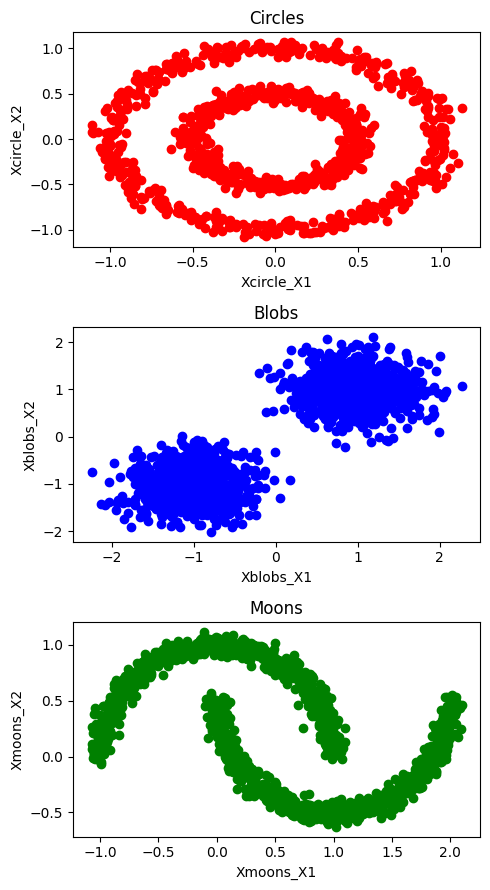

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(5, 9))

axs[0].scatter(circles['Xcircle_X1'], circles['Xcircle_X2'], c='red')
axs[0].set_title('Circles')
axs[0].set_xlabel('Xcircle_X1')
axs[0].set_ylabel('Xcircle_X2')

# Plot the blobs DataFrame
axs[1].scatter(blobs['Xblobs_X1'], blobs['Xblobs_X2'], c='blue')
axs[1].set_title('Blobs')
axs[1].set_xlabel('Xblobs_X1')
axs[1].set_ylabel('Xblobs_X2')

# Plot the moons DataFrame
axs[2].scatter(moons['Xmoons_X1'], moons['Xmoons_X2'], c='green')
axs[2].set_title('Moons')
axs[2].set_xlabel('Xmoons_X1')
axs[2].set_ylabel('Xmoons_X2')

# Adjust layout
plt.tight_layout()
plt.show()

In [95]:
def RangeQuery(DB, pt_idx, eps):
  P = np.array([DB.iloc[pt_idx,0], DB.iloc[pt_idx,1]])
  N = []
  for idx,row in DB.iterrows():
    Q = np.array([DB.iloc[idx,0], DB.iloc[idx,1]])
    if np.linalg.norm(P-Q) <= eps:
      N.append(idx)
  return N

In [96]:
def DBSCAN(DB, eps = 1, minPts = 3):
  c = 0
  idx = 0
  lbl = [None for i in range(len(DB))]

  while idx < DB.shape[0]:
    if(lbl[idx] is not None):
      idx+=1
      continue
    N = RangeQuery(DB, idx, eps)
    if(len(N) < minPts):
      lbl[idx] = -1 # lbl of -1 means noise
      idx+=1
      continue

    c += 1
    lbl[idx] = c

    seedset = []
    seedset.extend(N)
    seedset.remove(idx)

    while len(seedset)>0:
      pt = seedset.pop(0)

      if(lbl[pt] == -1):
        lbl[pt] = c

      elif(lbl[pt] is not None):
        continue

      lbl[pt] = c
      N = RangeQuery(DB, pt, eps)

      if(len(N) >= minPts):
        seedset.extend(N)

    idx+=1
  return lbl

In [135]:
# finding eps
# minPts = d+1 = 3
# plot 3rd Nearest Neighbor Distance of each point (histogram)
# Idea is that distance of Kth Nearest Neighbor for each point is similar but for a noise point it is a lot

def findEps(DB):
  # Convert DataFrame to NumPy array
  points = DB.to_numpy()

  # Build the KD-Tree
  kd_tree = KDTree(points)

  # Query the KD-Tree for the 3rd nearest neighbor distance for each point
  # `k=4` because the nearest neighbor includes the point itself as the 1st neighbor.
  distances, indices = kd_tree.query(points, k=4)

  third_nearest_distances = distances[:, 3]

  plt.figure(figsize=(5, 5))
  n, bins, patches = plt.hist(third_nearest_distances, bins=10, edgecolor='black')

  # Add frequency labels on top of each bar
  for count, x in zip(n, bins):
      plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

  plt.xlabel('3rd Nearest Neighbor Distance')
  plt.ylabel('Frequency')
  plt.title('Histogram of 3rd Nearest Neighbor Distances')
  plt.show()


In [161]:
def plotResult(data,lbls):
  unique_labels = np.unique(lbls)
  palette = sns.color_palette("hsv", len(unique_labels))
  color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

  # Assign colors to each point based on labels
  colors = [color_map[label] for label in lbls]

  # Plot the points
  plt.figure(figsize=(10, 4))
  plt.scatter(data.iloc[:,0], data.iloc[:,1], c=colors, s=50, edgecolor='black', alpha=0.7)

  # Create a legend
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10, label=label) for label in unique_labels]
  plt.legend(handles=handles, title="Labels")

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot of Points with Colored Labels')
  plt.show()

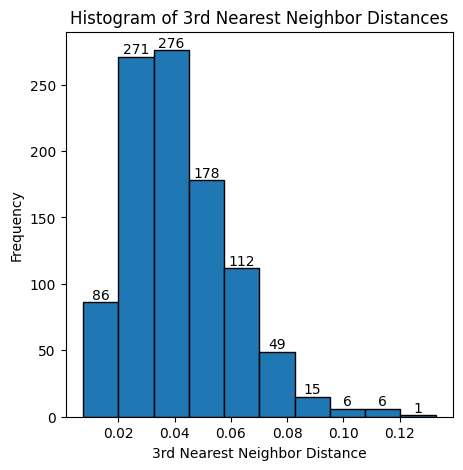

In [136]:
# For 92.3% of all points' 3rd Nearest Distance is within 0.07. Hence I choose Eps = 0.07
findEps(circles)

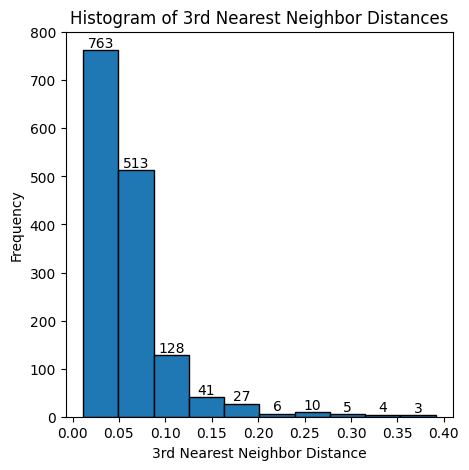

In [137]:
# For 93.6% of all points' 3rd Nearest Distance is within 0.125. Hence I choose Eps = 0.125
findEps(blobs)

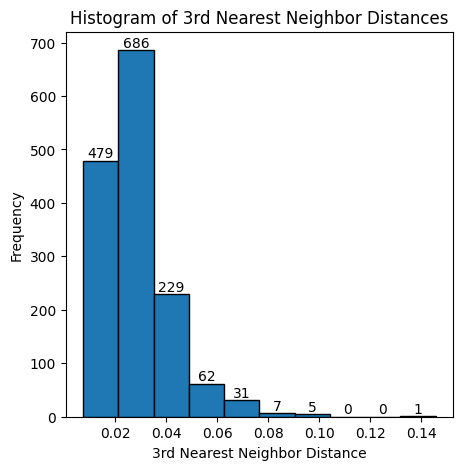

In [138]:
# For 92.9% of all points' 3rd Nearest Distance is within 0.05. Hence I choose Eps = 0.05
findEps(moons)

In [163]:
circle_lbls = DBSCAN(circles,eps=0.07,minPts=3)

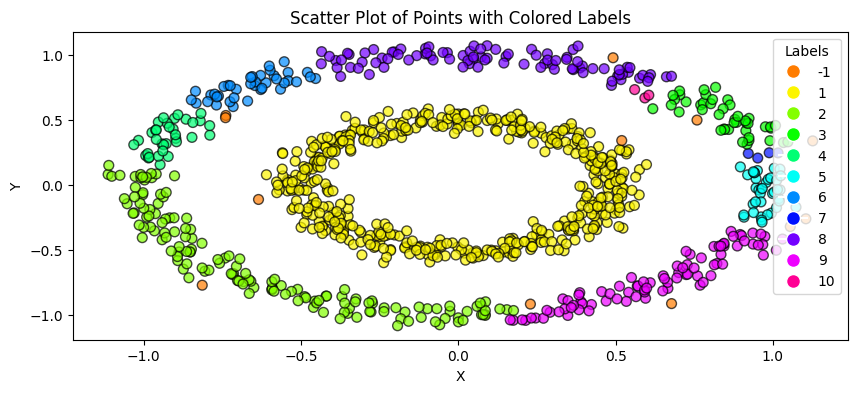

In [164]:
plotResult(circles,circle_lbls)

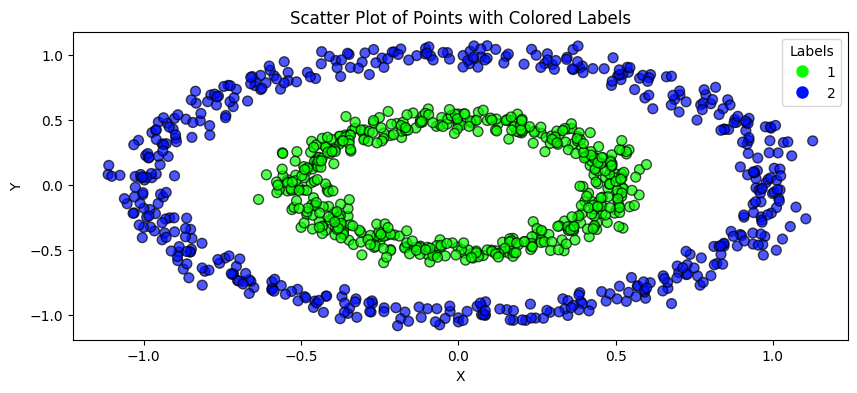

In [165]:
circle_lbls = DBSCAN(circles,eps=0.1,minPts=3)
plotResult(circles,circle_lbls)

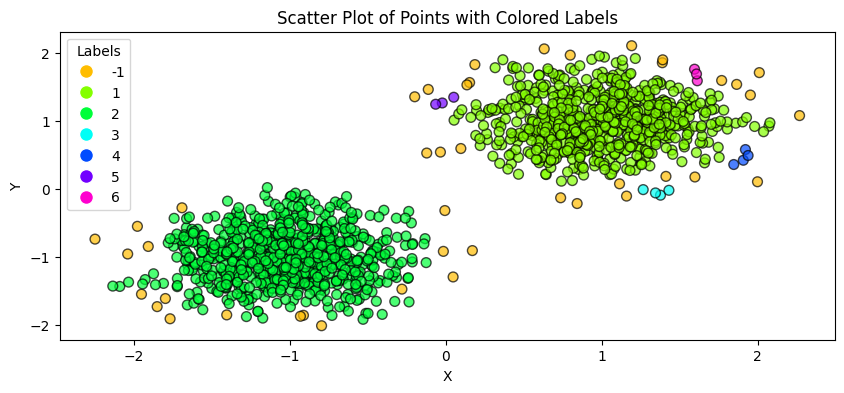

In [166]:
blobs_lbls = DBSCAN(blobs,eps=0.125,minPts=3)
plotResult(blobs,blobs_lbls)

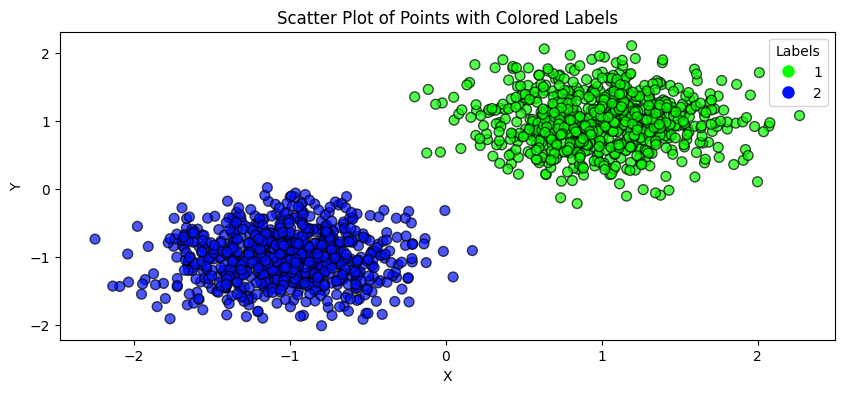

In [169]:
blobs_lbls = DBSCAN(blobs,eps=0.4,minPts=3)
plotResult(blobs,blobs_lbls)

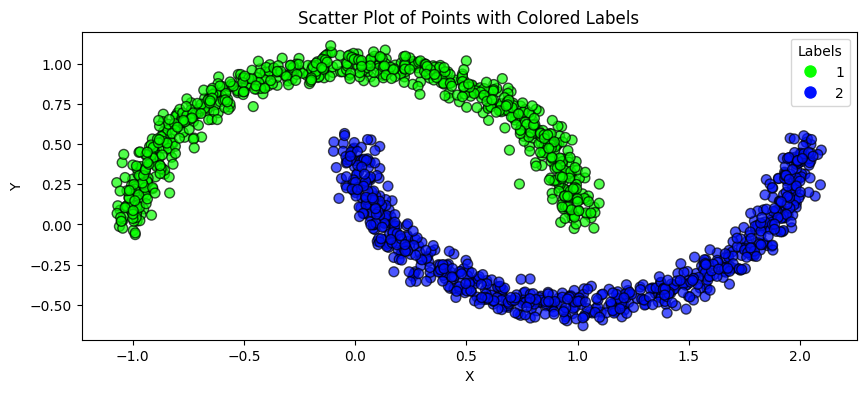

In [171]:
moons_lbls = DBSCAN(moons,eps=0.14,minPts=3)
plotResult(moons,moons_lbls)